In [4]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import detrend
import seaborn as sns
from scipy import fftpack

from __future__ import print_function, division
from numpy import *

import audio.wave as wave
from audio.filters import *
from audio.fourier import *
sns.set_style("dark")
import audio.index

In [2]:
def read(file):
    '''
    read a .hea file and convert it to a dataframe
    '''
    w = wfdb.rdsamp(file)
    return(pd.DataFrame(data=w[0], columns=w[1]['sig_name']))

<IPython.core.display.Javascript object>


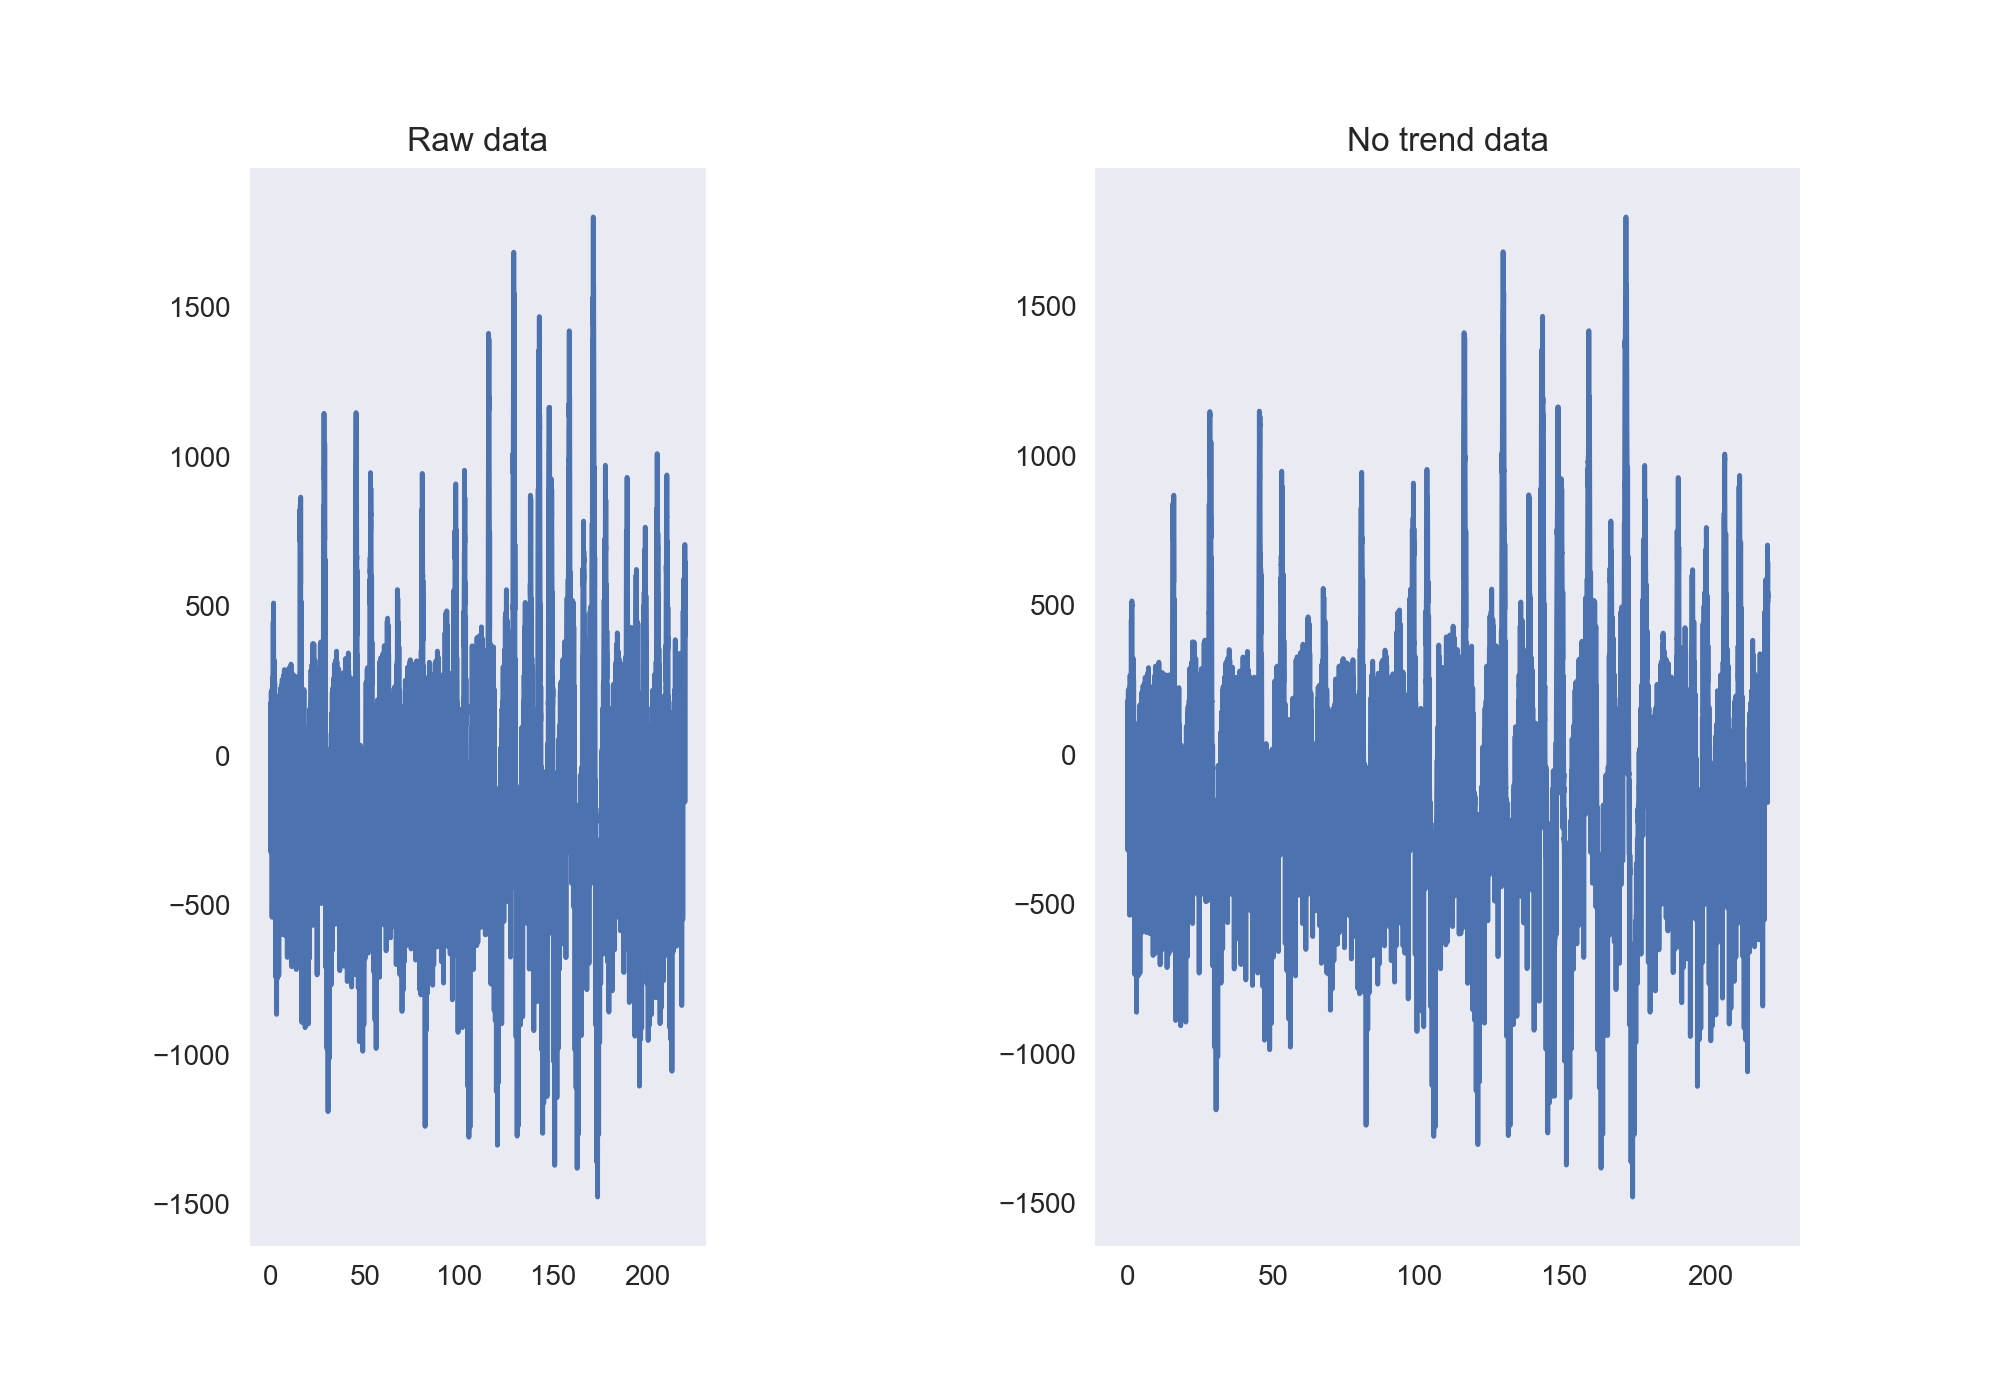

In [6]:
############
### data ###
############

w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs'] # header acces to frequency sampling
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name']) # convert the data into Pandas DataFrame
data = df.chest_ecg.values
t = np.linspace(0, np.shape(data)[0] / freq, np.shape(data)[0])
 
#######################
### removing trends ###
#######################

no_trend_data = detrend(data) # remove linear trend

############
### plot ###
############

plt.figure(figsize=(10, 7))
plt.subplot(1, 3, 1)
plt.plot(t, data)
plt.title("Raw data")
plt.subplot(1, 2, 2)
plt.plot(t, no_trend_data)
plt.title("No trend data")

In [15]:
data.min()

-1475.334439800836

In [26]:
w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs']
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name'])
dt = 1/freq
t = r_[0.:3.0:dt]
f = 440.0
x= df.chest_ecg.values
x= x/amax(x)

<IPython.core.display.Javascript object>


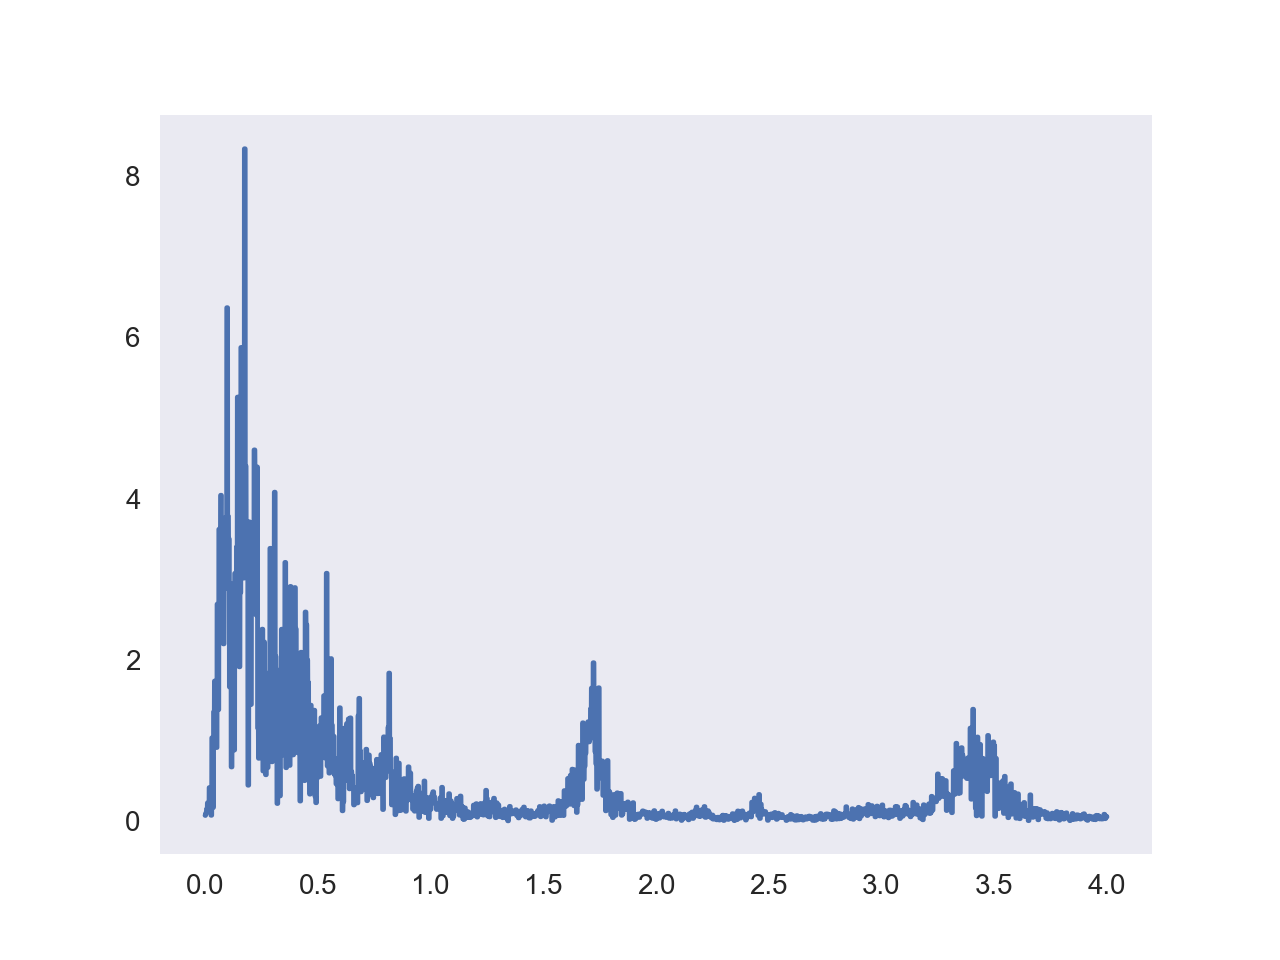

In [49]:
figure()
Fx = F(x, dt=dt, power_of_two=True)
f = r_[0.0:freq/2.0**6: freq/2.0**30]
plot(f, abs(Fx(f)))

In [34]:
help(F)

Help on function F in module audio.fourier:

F(x, **kwargs)
    Computes the Fourier transform of the object `x`.
    
    If the argument `x` is a numpy array, its spectral representation 
    is the Discrete-Time Fourier Transform (DTFT), 
    the function of the frequency $f$ given by:
    
    $$
    x(f) = \Delta t \sum_{j=0}^{n_x-1} x_n \exp(-2 i \pi f j \Delta t)
    $$
    
    Otherwise, the spectral representation depends on the object type.
    
    Arguments
    ---------
    `x:`
      : the object to transform, either a `numpy.ndarray` (1-dim.) or an object 
        that implements the Fourier protocol -- roughly speaking, that has a
        Fourier transform method `__F__`. 
        
    The extra arguments in `kwargs` are dependent of the object type.
    For numpy arrays, they are:
    
    `dt:`
      : sampling time, type `float`, defaults to `1.0`.
    
    `n:`
      : minimal number of points used in spectrum estimation; type `int`, 
        defaults to `None`.
  